In [1]:
from stock import* 
import numpy as np
import akshare as ak
import pandas as pd

In [2]:
import numpy as np
stock_list=["sz002594","sh603517","sh600031",
            "sz000858","sh603816","sh600690",
            "sh600519","sz002493","sh601318",
            "sz000895","sz002415","sh601021",
            "sz000333","sz300413","sz002332"]
day=70
ExpReturn=[]
ExpCov=[]
for s in stock_list:
    data = ak.stock_zh_a_daily(symbol=s, adjust="qfq")
    k=stock(data,s,day)
    ExpReturn.append(k.ExpReturn1())
    ExpCov.append(k.His_Return())
ExpReturn=np.array(ExpReturn)
ExpCov=np.array(ExpCov)
ExpCov=np.cov(ExpCov)
ExpCov

175     -3.756      0.000      -1.002      -0.315
sigma2      3908.1132    725.684      5.385      0.000    2485.799    5330.427
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 3.19
Prob(Q):                              0.70   Prob(JB):                         0.20
Heteroskedasticity (H):               0.36   Skew:                            -0.54
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.64

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=204.184, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=190.322, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=202.221, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=192.106, Time=0.05 sec
 ARIMA(2,2,1)

array([[ 8.74171826e-04,  1.93758872e-04,  2.72919369e-04,
         2.87894649e-04,  2.53463399e-04,  6.40007329e-05,
         2.12255504e-04,  2.53028897e-04,  1.58885341e-04,
         6.57212274e-05,  1.66495875e-04,  1.94492338e-04,
         1.41628587e-04,  1.87265467e-04,  1.80943442e-04],
       [ 1.93758872e-04,  7.38528405e-04,  1.68011917e-04,
         2.92014008e-04,  2.12833051e-04,  1.88494001e-05,
         2.13742155e-04,  1.47349977e-04,  9.94331621e-05,
         8.47302837e-05,  4.49807185e-05,  1.53236435e-04,
         7.60693047e-05,  1.24682703e-04,  2.05759255e-04],
       [ 2.72919369e-04,  1.68011917e-04,  5.75349500e-04,
         2.59672372e-04,  2.10254695e-04,  6.75490995e-05,
         1.97666331e-04,  2.43952388e-04,  1.91403888e-04,
         9.74429896e-05,  1.27825539e-04,  1.79262839e-04,
         1.47209419e-04,  1.53615020e-04,  1.76388630e-04],
       [ 2.87894649e-04,  2.92014008e-04,  2.59672372e-04,
         6.53647940e-04,  2.77097546e-04,  6.97987348

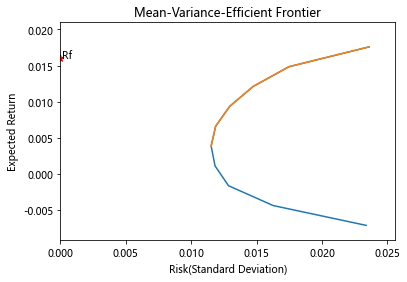

In [3]:
[target_variance, target_returns, PortWts, postive_target_returns, postive_target_variance]=frontcon(ExpReturn, ExpCov)
# 找到满足前沿条件的解（上半直线）
plt.plot(target_variance, target_returns)
plt.plot(postive_target_variance, postive_target_returns)
plt.scatter(0,RF,s=50,marker='*',c='red')
plt.text(0.0001,RF,'Rf')
plt.ylim(np.array(target_returns).min()-0.002,RF+0.005)
plt.xlim(0,np.array(target_variance).max()+0.002)
plt.title("Mean-Variance-Efficient Frontier")
plt.xlabel("Risk(Standard Deviation)")
plt.ylabel("Expected Return")
plt.show()

In [17]:
def get_M(postive_target_returns,postive_target_variance,RF)
    # 定义一个函数用来 计算 前后两点在 证券市场线上的值
    def value(k,RF,x):
        return k*x+RF
    # 计算 M 点
    M=0
    K=[]
    for i in range(1,len(postive_target_variance)):
        k = (postive_target_returns[i]-RF)/postive_target_variance[i]
        K.append(k)
        if i < len(postive_target_variance)-1 :
            x0=postive_target_variance[i-1]
            x1=postive_target_variance[i]
            x2=postive_target_variance[i+1]
            if value(k,RF,x0) < value(k,RF,x1) and value(k,RF,x2) < value(k,RF,x1) :
                M = i
        else :
            if M == 0 :
                M = i 
    E_rm=K[M]
    return [M,E_rm]


5

In [10]:
plan(stock_list,PortWts[8],1000000).perchase_plan()

股票sz002594购买0股
股票sh603517购买0股
股票sh600031购买0股
股票sz000858购买0股
股票sh603816购买9500股
股票sh600690购买0股
股票sh600519购买0股
股票sz002493购买0股
股票sh601318购买0股
股票sz000895购买2000股
股票sz002415购买1400股
股票sh601021购买0股
股票sz000333购买600股
股票sz300413购买0股
股票sz002332购买0股
